In [2]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import pandas as pd

In [3]:
#taxa we are excluding due to limitations of a sorting process (like medusa being too large for flowcam)
taxa_exclusion_list = []

In [4]:
#this is where the relative abundances are imported. Be sure to check the file name for desired computer predictions based on training strategy.
# max_relabunds.xlsx is for predictions with the model that has max_traning_class = unlimited
# relabunds.xlsx is for predictions from max_training_class = 5000
relabund_df = pd.read_excel('five_thousand_strat4_relabunds_feb4.xlsx')
#change names of sorting processes, then sort.
relabund_df = relabund_df.replace('AI', 'CI')
relabund_df = relabund_df.replace('MC', 'HM')
relabund_df = relabund_df.replace('FC', 'HI')
relabund_df = relabund_df.sort_values(by=['newName', 'regionYear', 'type', 'FlowCamID']).reset_index(drop=True)
#change region names
relabund_df = relabund_df.replace({'Gulf 2020': 'Gulf', 'Pac 21': 'Pacific' })
#remove rows where the newName matches any taxa in the taxa_exclusion_list
relabund_df = relabund_df[~relabund_df['newName'].isin(taxa_exclusion_list)]
relabund_df

,Unnamed: 0,newName,FlowCamID,type,regionYear,abund,sumabund,relabund
0,30,Acartia spp.,AMMP_Gulf_StPeters_1_20200903HT_250UM,CI,Gulf,52.000000,3847.000000,0.013517
1,33,Acartia spp.,AMMP_Gulf_StPeters_1_20200903LT_250UM,CI,Gulf,927.000000,3268.000000,0.283660
2,36,Acartia spp.,AMMP_Gulf_StPeters_1_20200904HT_250UM,CI,Gulf,99.000000,7495.000000,0.013209
3,39,Acartia spp.,AMMP_Gulf_StPeters_2B_20200903_250UM,CI,Gulf,1127.000000,2895.000000,0.389292
4,42,Acartia spp.,AMMP_Gulf_StPeters_2_20200903HT_250UM,CI,Gulf,1194.000000,4104.000000,0.290936
...,...,...,...,...,...,...,...,...
4255,4247,Tortanus spp.,AMMP_PA_S04W15_20210609LT_250um,HM,Pacific,2.591720,3992.867992,0.000649
4256,4250,Tortanus spp.,AMMP_PA_S04W15_20210610LT_250um,HM,Pacific,20.081536,4835.466496,0.004153
4257,4253,Tortanus spp.,AMMP_PA_S04W20_20210609HT_250um,HM,Pacific,7.060098,2970.977322,0.002376
4258,4256,Tortanus spp.,AMMP_PA_S04W20_20210609LT_250um,HM,Pacific,3.662212,5824.062256,0.000629


Gulf


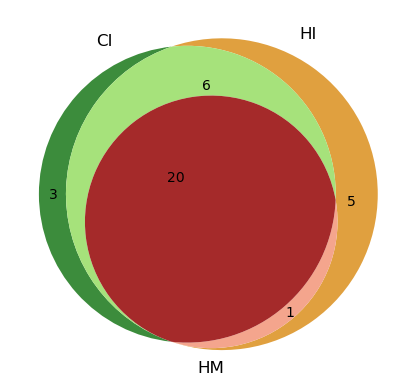

NL 2020


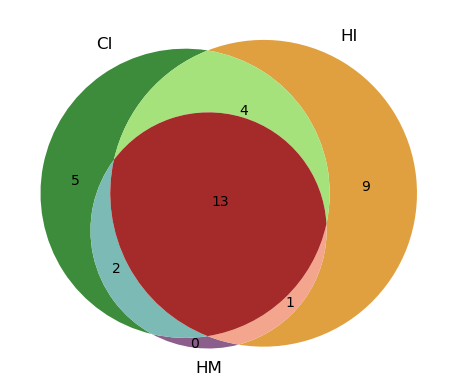

NL 2021


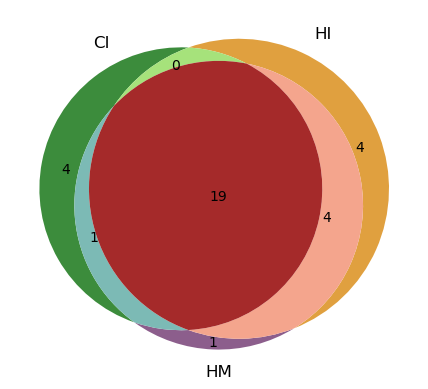

Pacific


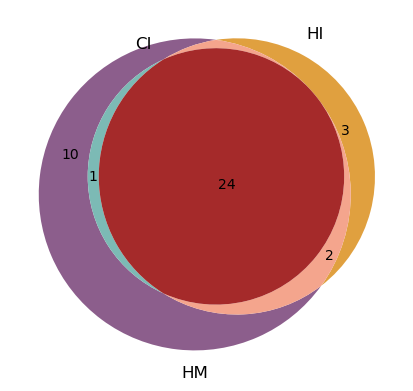

In [31]:
['#3c8c3c', '#e0a03f', '#8c5e8c', '#6dbf6d']

relabund_df = relabund_df[relabund_df['relabund'] > 0]
regionYears = relabund_df['regionYear'].unique()
for regionYear in regionYears:
    print(regionYear)
    region_df = relabund_df[relabund_df['regionYear'] == regionYear]
    ci_names = region_df[region_df['type'] == 'CI']['newName'].unique()
    hi_names = region_df[region_df['type'] == 'HI']['newName'].unique()
    hm_names = region_df[region_df['type'] == 'HM']['newName'].unique()
    


    # Convert lists to sets
    set1 = set(ci_names)
    set2 = set(hi_names)
    set3 = set(hm_names)
    
    # Compute the intersections and unique elements
    venn_data = {
        '100': len(set1 - set2 - set3),   # Only in set 1
        '010': len(set2 - set1 - set3),   # Only in set 2
        '001': len(set3 - set1 - set2),   # Only in set 3
        '110': len(set1 & set2 - set3),   # In both set 1 and set 2
        '101': len(set1 & set3 - set2),   # In both set 1 and set 3
        '011': len(set2 & set3 - set1),   # In both set 2 and set 3
        '111': len(set1 & set2 & set3),   # In all three sets
    }

    # Create the Venn diagram
    venn = venn3(subsets=venn_data, set_labels=('CI', 'HI', 'HM'))
    # Set custom colors for each region
    def set_patch_color(venn, id, color):
        patch = venn.get_patch_by_id(id)
        if patch is not None:
            patch.set_facecolor(color)
            patch.set_alpha(1)

    set_patch_color(venn, '100', '#3c8c3c')
    set_patch_color(venn, '010', '#e0a03f')
    set_patch_color(venn, '001', '#8c5e8c')
    set_patch_color(venn, '110', '#a6e27b')
    set_patch_color(venn, '101', '#7cbab5')
    set_patch_color(venn, '011', '#f4a58d')
    set_patch_color(venn, '111', 'brown')
    if regionYear == 'Gulf':
        venn.get_label_by_id('110').set_position((0, 0.4))
        venn.get_label_by_id('010').set_position((0.5, 0))
    if regionYear == 'Pacific':
        venn.get_label_by_id('001').set_position((-.5, 0.1))
        venn.get_label_by_id('011').set_position((0.4, -.25))
    # venn.get_patch_by_id('100').set_facecolor('#75ba75')  # Color for set 1
    # venn.get_patch_by_id('010').set_facecolor('#fec76f')  # Color for set 2
    # venn.get_patch_by_id('001').set_facecolor('#be95be')  # Color for set 3
    # venn.get_patch_by_id('110').set_facecolor('#ffcc99')  # Color for intersection of set 1 & 2
    # venn.get_patch_by_id('101').set_facecolor('#ffff99')  # Color for intersection of set 1 & 3
    # venn.get_patch_by_id('011').set_facecolor('#99ccff')  # Color for intersection of set 2 & 3
    # venn.get_patch_by_id('111').set_facecolor('#000000')  # Color for intersection of all three sets
    # Display the plot
    plt.show()
    plt.close()